In [14]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

In [2]:
t2E = lambda e, t : fsolve(lambda E : E - e*np.sin(E) - t, t/(1 - e))

In [3]:
e = .6 # eccentricity
n = 100 # plot points
t = np.linspace(0, 9, n)
E = t2E(e, t)
x = np.cos(E) - e
y = np.sin(E)

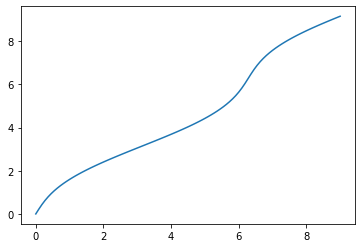

In [4]:
plt.plot(t, E)

In [5]:
def compute_eccentricity1(E, ell, m, mu):
    # E is the orbital energy
    # ell is the angular momentum
    # m is
    # mu is
    e = np.sqrt( 1 + ( (2*E*ell**2) / (m**3*mu**2) ) )
    return e   

def compute_eccentricity2(a,b):
    # a - semi-major axis
    # b - semi-minor axis
    e = np.sqrt( 1 - ( (b**2) / (a**2) ) )
    return e  

In [6]:
def compute_time(E,e,a):
    # 398600.4 is a gravitational parameter
    t = a * np.sqrt( a / 398600.4 ) * (E - e * np.sin(E))
    return t

In [7]:
a = 2
b = 1
alpha = 1
u = a * (np.cos(E) - e)
v = b * np.sin(E)

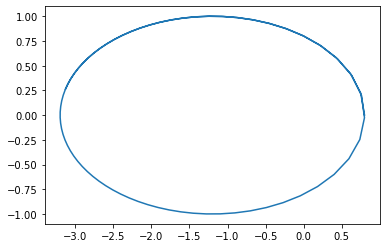

In [8]:
plt.plot(u,v)

In [9]:
import ipywidgets as widgets
 
widgets.IntSlider()

IntSlider(value=0)

In [10]:
theta = 83
lamb = 24

n = [np.cos(lamb) * np.sin(theta), np.sin(lamb) * np.sin(theta), np.cos(theta)]
k = [0,0,1]

P = np.cross(n,k)
Q = np.cross(n,P)

In [11]:
X = u*P[0] + v*Q[0]
Y = u*P[1] + v*Q[1]
Z = u*P[2] + v*Q[2]

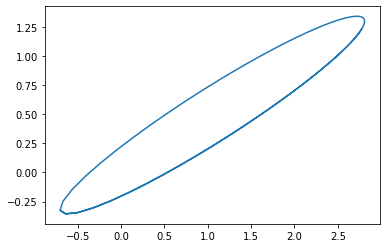

In [12]:
plt.plot(X,Y)

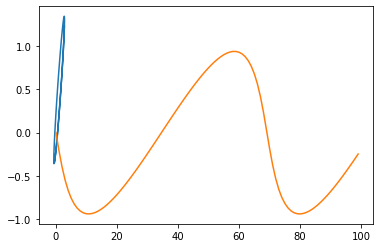

In [13]:
plt.plot(X,Y,Z)

In [22]:
fig = plt.figure()
Axes3D.plot_surface(X, Y, Z)

TypeError: plot_wireframe() missing 1 required positional argument: 'Z'

<Figure size 432x288 with 0 Axes>

In [20]:
print(np.size(Z))
print(np.size(Y))
print(np.size(X))

100
100
100
